In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import wordcloud
from wordcloud import WordCloud

# Import matplotlib
import matplotlib.pyplot as plt

# Import nltk
import nltk

# Import textblob
from textblob import TextBlob

# Import seaborn
import seaborn as sns

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from nltk import word_tokenize

In [5]:
earphone = pd.read_csv('FlipkartData.csv')

In [6]:
earphone

Product  Price  ReviewStar         ReviewTitle  \
0        boAt Rockerz 255  1,299           5              super!   
1        boAt Rockerz 255  1,299           5             awesome   
2        boAt Rockerz 255  1,299           3                fair   
3        boAt Rockerz 255  1,299           1     useless product   
4        boAt Rockerz 255  1,299           3                fair   
...                   ...    ...         ...                 ...   
8980  Sennheiser CX 6.0BT  7,099           5  highly recommended   
8981  Sennheiser CX 6.0BT  7,099           5   worth every penny   
8982  Sennheiser CX 6.0BT  7,099           5           brilliant   
8983  Sennheiser CX 6.0BT  7,099           5  highly recommended   
8984  Sennheiser CX 6.0BT  7,099           5           just wow!   

                                             ReviewBody  
0     great cooler excellent air flow and for this p...  
1                 best budget 2 fit cooler nice cooling  
2     the quality is good but the power of air is de...  
3                     very bad product its a only a fan  
4                                         ok ok product  
...                                                 ...  
8980                                              super  
8981                                       nice product  
8982                        best quality of the product  
8983                                  very nice product  
8984                                    awesome product  

[8985 rows x 5 columns]

In [7]:
earphone.head()

Product  Price  ReviewStar      ReviewTitle  \
0  boAt Rockerz 255  1,299           5           super!   
1  boAt Rockerz 255  1,299           5          awesome   
2  boAt Rockerz 255  1,299           3             fair   
3  boAt Rockerz 255  1,299           1  useless product   
4  boAt Rockerz 255  1,299           3             fair   

                                          ReviewBody  
0  great cooler excellent air flow and for this p...  
1              best budget 2 fit cooler nice cooling  
2  the quality is good but the power of air is de...  
3                  very bad product its a only a fan  
4                                      ok ok product

In [8]:
unique_list=[]
unique=[unique_list.append(x) for x in earphone['Product'] if x not in unique_list]
print(unique_list)

['boAt Rockerz 255', 'Product', 'JBL T205BT', 'Skullcandy S2PGHW-174', 'JBL T110BT', 'Sennheiser CX 6.0BT']


In [9]:
boat = earphone[earphone['Product']=="boAt Rockerz 255"]
skullcandy = earphone[earphone['Product']=="Skullcandy S2PGHW-174"]
jbl1 =  earphone[earphone['Product']=="JBL T110BT"]
jbl2 = earphone[earphone['Product']=="JBL T205BT"]
Sennheiser = earphone[earphone['Product']=="Sennheiser CX 6.0BT"]


In [10]:
print(boat.isna().sum())
print(skullcandy.isna().sum())
print(jbl1.isna().sum())
print(jbl2.isna().sum())
print(Sennheiser.isna().sum())

Product        0
Price          0
ReviewStar     0
ReviewTitle    0
ReviewBody     0
dtype: int64
Product        0
Price          0
ReviewStar     0
ReviewTitle    0
ReviewBody     0
dtype: int64
Product        0
Price          0
ReviewStar     0
ReviewTitle    0
ReviewBody     0
dtype: int64
Product        0
Price          0
ReviewStar     0
ReviewTitle    0
ReviewBody     0
dtype: int64
Product        0
Price          0
ReviewStar     0
ReviewTitle    0
ReviewBody     0
dtype: int64


In [11]:
boat_review = boat['ReviewBody'].reset_index()
skullcandy_review = skullcandy ['ReviewBody'].reset_index()
jbl1_review = jbl1['ReviewBody'].reset_index()
jbl2_review = jbl2['ReviewBody'].reset_index()
Sennheiser_review = Sennheiser['ReviewBody'].reset_index()

In [12]:
boat_str = boat_review['ReviewBody'].str.cat(sep='')
skullcandy_str = skullcandy_review['ReviewBody'].str.cat(sep='')
jbl1_str = jbl1_review['ReviewBody'].str.cat(sep='')
jbl2_str = jbl2_review['ReviewBody'].str.cat(sep='')
Sennheiser_str = Sennheiser_review['ReviewBody'].str.cat(sep='')

In [13]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords data
nltk.download('stopwords')

# Define the set of stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vasu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


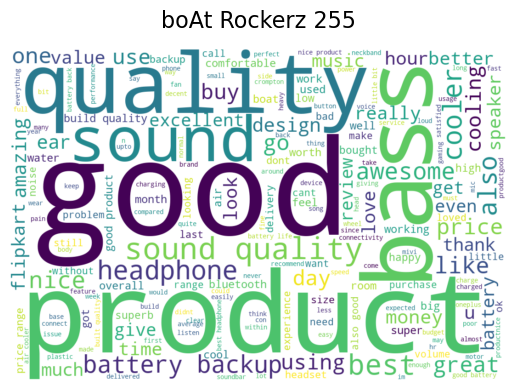

In [14]:
from wordcloud import WordCloud  # Correcting the import statement

# Assuming you have already defined `boat_str` and `STOPWORDS`
boat_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(boat_str)
plt.imshow(boat_wc, interpolation='bilinear')
plt.axis('off')
plt.title('boAt Rockerz 255', size=16, y=1.04)
plt.show()


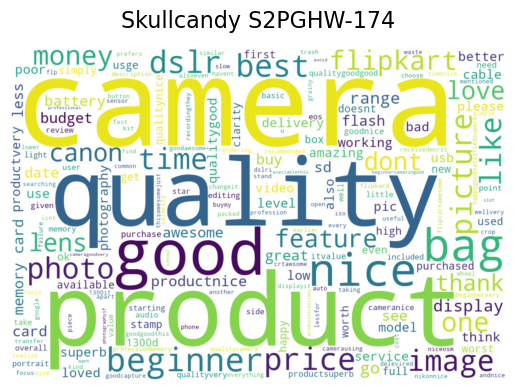

In [15]:
skullcandy_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(skullcandy_str)
plt.imshow(skullcandy_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Skullcandy S2PGHW-174', size=16, y=1.04)
plt.show()


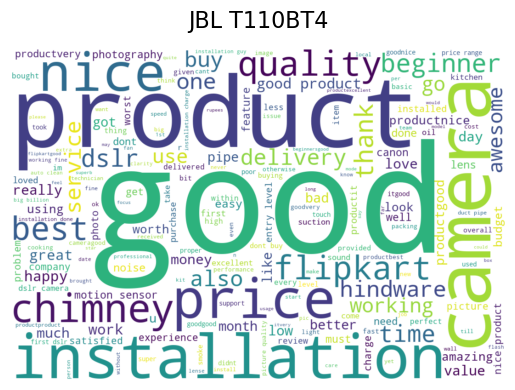

In [16]:
jbl1_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(jbl1_str)
plt.imshow(jbl1_wc, interpolation='bilinear')
plt.axis('off')
plt.title('JBL T110BT4', size=16, y=1.04)
plt.show()

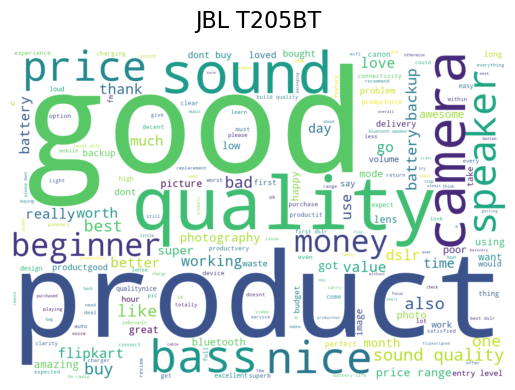

In [17]:
jbl2_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(jbl2_str)
plt.imshow(jbl2_wc, interpolation='bilinear')
plt.axis('off')
plt.title('JBL T205BT', size=16, y=1.04)
plt.show()

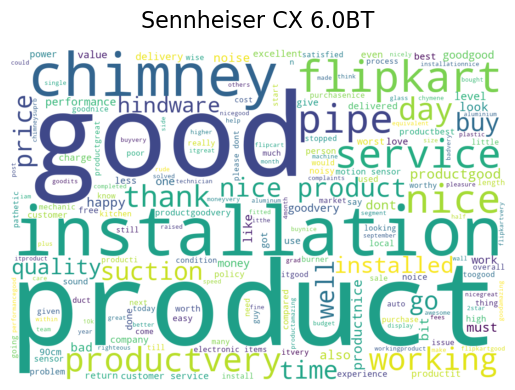

In [18]:
Sennheiser_wc = WordCloud(background_color='white', width=1080, height=720, stopwords=STOPWORDS).generate(Sennheiser_str)
plt.imshow(Sennheiser_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Sennheiser CX 6.0BT', size=16, y=1.04)
plt.show()

In [19]:
english_stopwords_re = list(ENGLISH_STOP_WORDS) + ['product', 'earphone', 'use', 'boat', 'jbl', 'skullcandy', 'Sennheiser', 'got', 'using', 'ear', 'phone','nice' ]

In [20]:
boat_vector = TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(boat_review['ReviewBody'])


C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


In [21]:
# Transform the text data into a TF-IDF matrix
x_b = boat_vector.transform(boat_review['ReviewBody'])

In [22]:
# Convert the sparse matrix into a DataFrame
boat_transformed = pd.DataFrame(x_b.toarray(), columns=boat_vector.get_feature_names_out())


In [23]:
boat_transformed.head()

air  air cooler  air throw   amazing  amazing sound  audio  aux  \
0  0.349327         0.0        0.0  0.333947            0.0    0.0  0.0   
1  0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   
2  0.403076         0.0        0.0  0.000000            0.0    0.0  0.0   
3  0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   
4  0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   

   average  awesome  awesome sound  ...  week  weight  wireless  wonderful  \
0      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
1      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
2      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
3      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
4      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   

   work  working  works  worst  worth  worth money  
0   0.0      0.0    0.0    0.0    0.0          0.0  
1   0.0      0.0    0.0    0.0    0.0          0.0  
2   0.0      0.0    0.0    0.0    0.0          0.0  
3   0.0      0.0    0.0    0.0    0.0          0.0  
4   0.0      0.0    0.0    0.0    0.0          0.0  

[5 rows x 200 columns]

In [24]:
skullcandy_vector = TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(skullcandy_review['ReviewBody'])


C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


In [25]:
# Transform the text data into a TF-IDF matrix
x_b = skullcandy_vector.transform(skullcandy_review['ReviewBody'])

In [26]:
skullcandy_transformed = pd.DataFrame(x_b.toarray(), columns=skullcandy_vector.get_feature_names_out())

In [27]:
skullcandy_transformed.head()

amazing  audio  available  awesome  awsome  bad  bag  bag memory  bag sd  \
0      0.0    0.0   0.000000      0.0     0.0  0.0  0.0         0.0     0.0   
1      0.0    0.0   0.000000      0.0     0.0  0.0  0.0         0.0     0.0   
2      0.0    0.0   0.000000      0.0     0.0  0.0  0.0         0.0     0.0   
3      0.0    0.0   0.114162      0.0     0.0  0.0  0.0         0.0     0.0   
4      0.0    0.0   0.000000      0.0     0.0  0.0  0.0         0.0     0.0   

    battery  ...  usge  value  value money  video  waste  working  worst  \
0  0.321167  ...   0.0    0.0          0.0    0.0    0.0      0.0    0.0   
1  0.000000  ...   0.0    0.0          0.0    0.0    0.0      0.0    0.0   
2  0.000000  ...   0.0    0.0          0.0    0.0    0.0      0.0    0.0   
3  0.000000  ...   0.0    0.0          0.0    0.0    0.0      0.0    0.0   
4  0.000000  ...   0.0    0.0          0.0    0.0    0.0      0.0    0.0   

   worth  worth money  worthy  
0    0.0          0.0     0.0  
1    0.0          0.0     0.0  
2    0.0          0.0     0.0  
3    0.0          0.0     0.0  
4    0.0          0.0     0.0  

[5 rows x 200 columns]

In [28]:
jbl1_vector = TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(jbl1_review['ReviewBody'])


C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


In [29]:
# Transform the text data into a TF-IDF matrix
x_b = jbl1_vector.transform(jbl1_review['ReviewBody'])
jbl1_transformed = pd.DataFrame(x_b.toarray(), columns=jbl1_vector.get_feature_names_out())
jbl1_transformed.head()

aluminium  amazing  auto  auto clean  average  awesome  awesome camera  \
0        0.0      0.0   0.0         0.0      0.0      0.0             0.0   
1        0.0      0.0   0.0         0.0      0.0      0.0             0.0   
2        0.0      0.0   0.0         0.0      0.0      0.0             0.0   
3        0.0      0.0   0.0         0.0      0.0      0.0             0.0   
4        0.0      0.0   0.0         0.0      0.0      0.0             0.0   

   bad  basic  beautiful  ...  waste  wonderful  work  working  working fine  \
0  0.0    0.0        0.0  ...    0.0        0.0   0.0      0.0           0.0   
1  0.0    0.0        0.0  ...    0.0        0.0   0.0      0.0           0.0   
2  0.0    0.0        0.0  ...    0.0        0.0   0.0      0.0           0.0   
3  0.0    0.0        0.0  ...    0.0        0.0   0.0      0.0           0.0   
4  0.0    0.0        0.0  ...    0.0        0.0   0.0      0.0           0.0   

   works  worst  worth  worth buying  worth money  
0    0.0    0.0    0.0           0.0          0.0  
1    0.0    0.0    0.0           0.0          0.0  
2    0.0    0.0    0.0           0.0          0.0  
3    0.0    0.0    0.0           0.0          0.0  
4    0.0    0.0    0.0           0.0          0.0  

[5 rows x 200 columns]

In [30]:
jbl2_vector = TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(jbl2_review['ReviewBody'])
# Transform the text data into a TF-IDF matrix
x_b = jbl2_vector.transform(jbl2_review['ReviewBody'])
jbl2_transformed = pd.DataFrame(x_b.toarray(), columns=jbl2_vector.get_feature_names_out())
jbl2_transformed.head()                                                                                                                                              

C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


amazing  auto  aux  average  awesome  backup  backup good  bad  \
0      0.0   0.0  0.0      0.0      0.0     0.0          0.0  0.0   
1      0.0   0.0  0.0      0.0      0.0     0.0          0.0  0.0   
2      0.0   0.0  0.0      0.0      0.0     0.0          0.0  0.0   
3      0.0   0.0  0.0      0.0      0.0     0.0          0.0  0.0   
4      0.0   0.0  0.0      0.0      0.0     0.0          0.0  0.0   

   bad quality  bag  ...  wifi  wonderful  work  working  works  worst  worth  \
0          0.0  0.0  ...   0.0        0.0   0.0      0.0    0.0    0.0    0.0   
1          0.0  0.0  ...   0.0        0.0   0.0      0.0    0.0    0.0    0.0   
2          0.0  0.0  ...   0.0        0.0   0.0      0.0    0.0    0.0    0.0   
3          0.0  0.0  ...   0.0        0.0   0.0      0.0    0.0    0.0    0.0   
4          0.0  0.0  ...   0.0        0.0   0.0      0.0    0.0    0.0    0.0   

   worth money  worth price  zebronics  
0          0.0          0.0        0.0  
1          0.0          0.0        0.0  
2          0.0          0.0        0.0  
3          0.0          0.0        0.0  
4          0.0          0.0        0.0  

[5 rows x 200 columns]

In [31]:
Sennheiser_vector=TfidfVectorizer(stop_words=english_stopwords_re, ngram_range=(1,2), max_features=200, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(Sennheiser_review['ReviewBody'])
# Transform the text data into a TF-IDF matrix
x_b = jbl2_vector.transform(Sennheiser_review['ReviewBody'])
Sennheiser_transformed = pd.DataFrame(x_b.toarray(), columns=Sennheiser_vector.get_feature_names_out())
Sennheiser_transformed.head()

C:\Users\Vasu\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sennheiser'] not in stop_words.
  warnings.warn(


amazing  auto  awesome  bad  best  best chimney  better  bit  bit noisy  \
0      0.0   0.0      0.0  0.0   0.0           0.0     0.0  0.0        0.0   
1      0.0   0.0      0.0  0.0   0.0           0.0     0.0  0.0        0.0   
2      0.0   0.0      0.0  0.0   0.0           0.0     0.0  0.0        0.0   
3      0.0   0.0      0.0  0.0   0.0           0.0     0.0  0.0        0.0   
4      0.0   0.0      0.0  0.0   0.0           0.0     0.0  1.0        0.0   

   budget  ...  value  value money  wise      work  working  working good  \
0     0.0  ...    0.0          0.0   0.0  0.286613      0.0           0.0   
1     0.0  ...    0.0          0.0   0.0  0.000000      0.0           0.0   
2     0.0  ...    0.0          0.0   0.0  0.476305      0.0           0.0   
3     0.0  ...    0.0          0.0   0.0  0.000000      0.0           0.0   
4     0.0  ...    0.0          0.0   0.0  0.000000      0.0           0.0   

   worst  worst service  worth  worthy  
0    0.0            0.0    0.0     0.0  
1    0.0            0.0    0.0     0.0  
2    0.0            0.0    0.0     0.0  
3    0.0            0.0    0.0     0.0  
4    0.0            0.0    0.0     0.0  

[5 rows x 200 columns]

In [32]:
boat_score=boat['ReviewBody']
boat_score.head()

0    great cooler excellent air flow and for this p...
1                best budget 2 fit cooler nice cooling
2    the quality is good but the power of air is de...
3                    very bad product its a only a fan
4                                        ok ok product
Name: ReviewBody, dtype: object

In [33]:
Sennheiser_score=Sennheiser['ReviewBody']
Sennheiser_score.head()

8546    pathetic product from day 1 its stopped workin...
8547    the installation team was so rude garrulous an...
8548    its used very rarely to make breakfast of my k...
8549                                     product was good
8550                                              too bad
Name: ReviewBody, dtype: object

In [34]:
jbl1_score=jbl1['ReviewBody']
jbl1_score.head()

6624                                      thanks flipkart
6625    this is good product but add mic jack this is ...
6626                                            very nice
6627    it was the one of the best product for beginne...
6628           best in this price segment got it in 19990
Name: ReviewBody, dtype: object

In [35]:
jbl2_score=jbl2['ReviewBody']
jbl2_score.head()

4974                                        its very good
4975                    nice product sound and bass super
4976                spr product and good quality so happy
4977    not up to the expectation bass is not that goo...
4978                                                 best
Name: ReviewBody, dtype: object

In [36]:
skullcandy_score=skullcandy['ReviewBody']
skullcandy_score.head()

6385    image quality isnt so great rendering grainy i...
6386    nice product and on time delivery by flipkart ...
6387                                    very poor quality
6388    camera has not date and time stamp feature its...
6389                             memory card not received
Name: ReviewBody, dtype: object

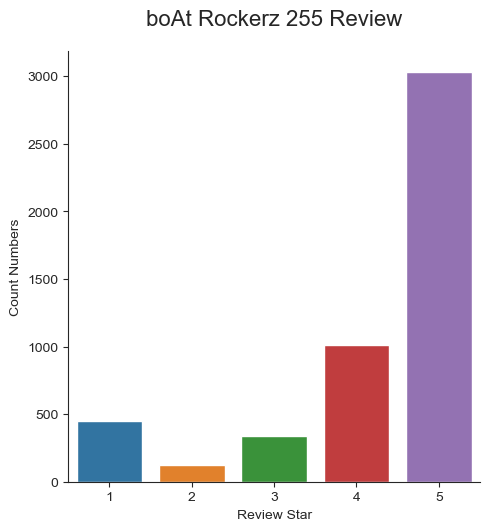

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')
sns.catplot(x='ReviewStar', data=boat, kind='count')
sns.set_context("notebook")
plt.title('boAt Rockerz 255 Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')
plt.show()


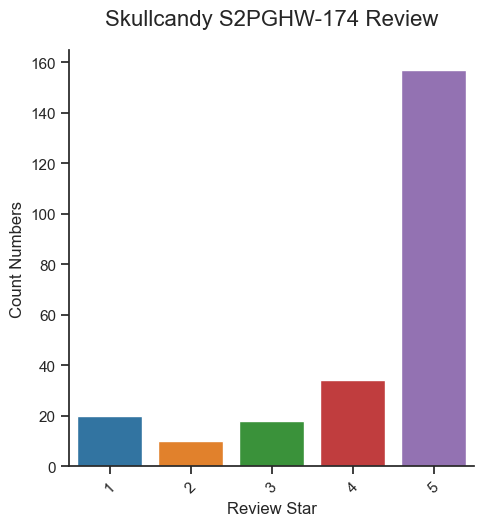

In [38]:
# Create a count plot of the number of reviews for each star rating
sns.catplot(x='ReviewStar', data=skullcandy, kind='count')

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)  

# Add a title and labels
plt.title('Skullcandy S2PGHW-174 Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')

# Show the plot
plt.show()

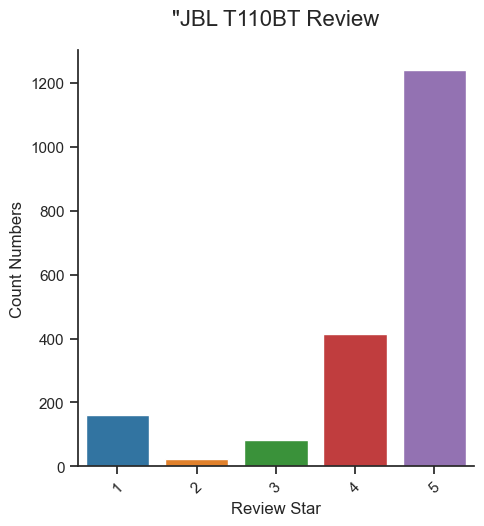

In [39]:
# Create a count plot of the number of reviews for each star rating
sns.catplot(x='ReviewStar', data=jbl1, kind='count')

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)  

# Add a title and labels
plt.title('"JBL T110BT Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')

# Show the plot
plt.show()

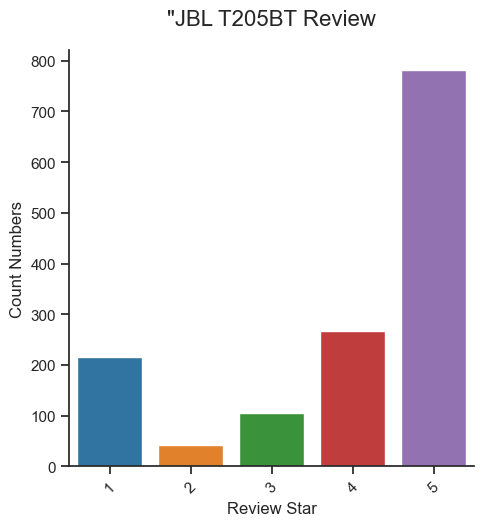

In [40]:
# Create a count plot of the number of reviews for each star rating
sns.catplot(x='ReviewStar', data=jbl2, kind='count')

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)  

# Add a title and labels
plt.title('"JBL T205BT Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')

# Show the plot
plt.show()

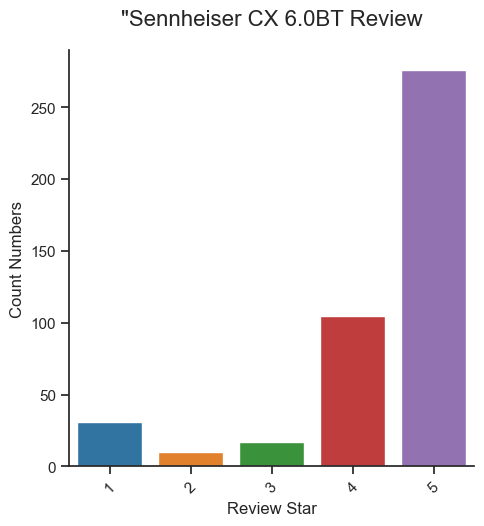

In [41]:
# Create a count plot of the number of reviews for each star rating
sns.catplot(x='ReviewStar', data=Sennheiser, kind='count')

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)  

# Add a title and labels
plt.title('"Sennheiser CX 6.0BT Review', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Count Numbers')

# Show the plot
plt.show()

C:\Users\Vasu\AppData\Local\Temp\ipykernel_7732\1876508271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skullcandy['tokens'] = skullcandy['ReviewBody'].apply(lambda x: len(x.split()))


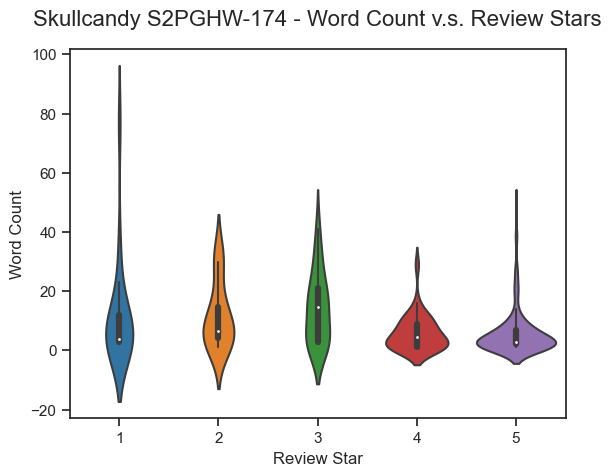

In [42]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
skullcandy['tokens'] = skullcandy['ReviewBody'].apply(lambda x: len(x.split()))

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=skullcandy)
sns.set_context("notebook")
plt.title('Skullcandy S2PGHW-174 - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()


C:\Users\Vasu\AppData\Local\Temp\ipykernel_7732\2037586542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boat['tokens'] = boat['ReviewBody'].apply(lambda x: len(x.split()))


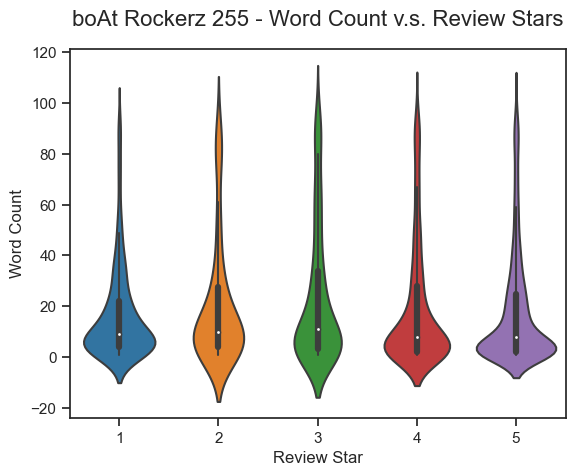

In [43]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
boat['tokens'] = boat['ReviewBody'].apply(lambda x: len(x.split()))

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=boat)
sns.set_context("notebook")
plt.title('boAt Rockerz 255 - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()

C:\Users\Vasu\AppData\Local\Temp\ipykernel_7732\3729704479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jbl1['tokens'] = jbl1['ReviewBody'].apply(lambda x: len(x.split()))


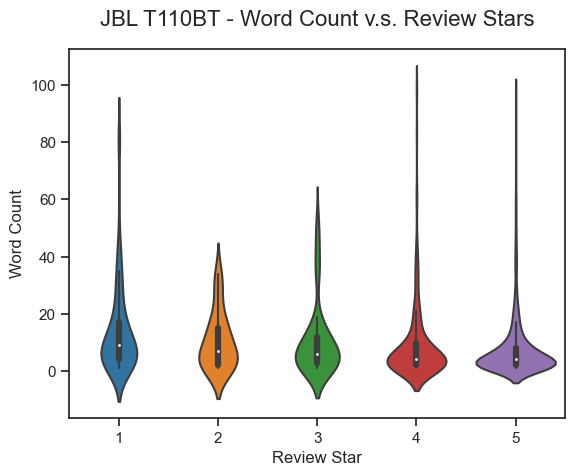

In [44]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
jbl1['tokens'] = jbl1['ReviewBody'].apply(lambda x: len(x.split()))

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=jbl1)

# Add a title and labels
plt.title('JBL T110BT - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()


C:\Users\Vasu\AppData\Local\Temp\ipykernel_7732\922992909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jbl2['tokens'] = jbl2['ReviewBody'].apply(lambda x: len(x.split()))


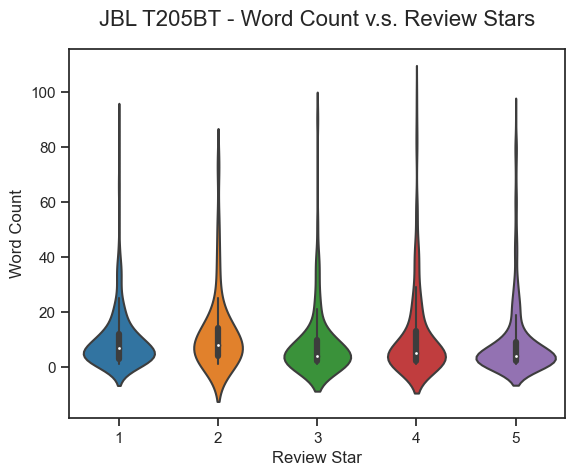

In [45]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
jbl2['tokens'] = jbl2['ReviewBody'].apply(lambda x: len(x.split()))

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=jbl2)

# Add a title and labels
plt.title('JBL T205BT - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()

C:\Users\Vasu\AppData\Local\Temp\ipykernel_7732\1967267964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sennheiser['tokens'] = Sennheiser['ReviewBody'].apply(lambda x: len(x.split()))


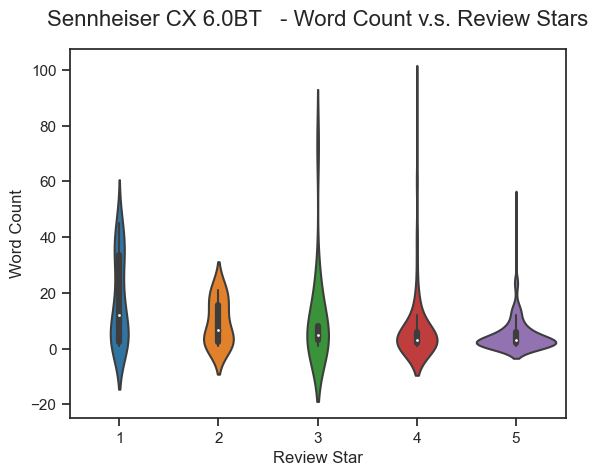

In [46]:
# Assuming 'ReviewBody' contains the text data in your DataFrame
Sennheiser['tokens'] = Sennheiser['ReviewBody'].apply(lambda x: len(x.split()))

# Create a violin plot of word count distribution for each star rating
sns.violinplot(x='ReviewStar', y='tokens', data=Sennheiser)

# Add a title and labels
plt.title('Sennheiser CX 6.0BT   - Word Count v.s. Review Stars', size=16, y=1.04)
plt.xlabel('Review Star')
plt.ylabel('Word Count')
plt.show()

In [47]:
boat_transformed


air  air cooler  air throw   amazing  amazing sound  audio  aux  \
0     0.349327         0.0        0.0  0.333947            0.0    0.0  0.0   
1     0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   
2     0.403076         0.0        0.0  0.000000            0.0    0.0  0.0   
3     0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   
4     0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   
...        ...         ...        ...       ...            ...    ...  ...   
4956  0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   
4957  0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   
4958  0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   
4959  0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   
4960  0.000000         0.0        0.0  0.000000            0.0    0.0  0.0   

      average  awesome  awesome sound  ...  week  weight  wireless  wonderful  \
0         0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
1         0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
2         0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
3         0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
4         0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
...       ...      ...            ...  ...   ...     ...       ...        ...   
4956      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
4957      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
4958      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
4959      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   
4960      0.0      0.0            0.0  ...   0.0     0.0       0.0        0.0   

      work  working  works  worst  worth  worth money  
0      0.0      0.0    0.0    0.0    0.0          0.0  
1      0.0      0.0    0.0    0.0    0.0          0.0  
2      0.0      0.0    0.0    0.0    0.0          0.0  
3      0.0      0.0    0.0    0.0    0.0          0.0  
4      0.0      0.0    0.0    0.0    0.0          0.0  
...    ...      ...    ...    ...    ...          ...  
4956   0.0      0.0    0.0    0.0    0.0          0.0  
4957   0.0      0.0    0.0    0.0    0.0          0.0  
4958   0.0      0.0    0.0    0.0    0.0          0.0  
4959   0.0      0.0    0.0    0.0    0.0          0.0  
4960   0.0      0.0    0.0    0.0    0.0          0.0  

[4961 rows x 200 columns]

In [48]:
boat_score

0       great cooler excellent air flow and for this p...
1                   best budget 2 fit cooler nice cooling
2       the quality is good but the power of air is de...
3                       very bad product its a only a fan
4                                           ok ok product
                              ...                        
4969                                            very good
4970                                    very nice product
4971    nice looking and sound effects so goodmusic wi...
4972                                       good sound bar
4973                                  super sound quality
Name: ReviewBody, Length: 4961, dtype: object

In [49]:
pip install gensim nltk

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords

In [51]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vasu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
earphone = pd.DataFrame(earphone)
reviews = earphone['ReviewBody'].values.tolist()


In [53]:
# Preprocess the reviews
def preprocess(text):
    if isinstance(text, str):
        return [word for word in simple_preprocess(text) if word not in stopwords.words('english')]
    else:
        return []

In [54]:
processed_reviews = [preprocess(review) for review in reviews]

In [55]:
# Create Dictionary and Corpus
id2word = corpora.Dictionary(processed_reviews)
corpus = [id2word.doc2bow(text) for text in processed_reviews]


In [56]:
# Build LDA Model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=2,  # Adjust the number of topics as needed
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [57]:
# Print the Keywords in the Topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.079*"product" + 0.078*"good" + 0.047*"nice" + 0.018*"camera" + '
  '0.014*"flipkart" + 0.012*"best" + 0.010*"installation" + 0.009*"working" + '
  '0.009*"buy" + 0.008*"cooler"'),
 (1,
  '0.041*"quality" + 0.036*"good" + 0.034*"sound" + 0.021*"bass" + '
  '0.017*"battery" + 0.016*"awesome" + 0.013*"best" + 0.010*"price" + '
  '0.010*"backup" + 0.010*"super"')]


In [58]:
# Format the topics for easier viewing
topics = lda_model.show_topics(formatted=False)
for topic in topics:
    print(f"Topic {topic[0]}: {[word for word, _ in topic[1]]}")


Topic 0: ['product', 'good', 'nice', 'camera', 'flipkart', 'best', 'installation', 'working', 'buy', 'cooler']
Topic 1: ['quality', 'good', 'sound', 'bass', 'battery', 'awesome', 'best', 'price', 'backup', 'super']


In [59]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. Lower is better.



Perplexity:  -6.762979901831529


In [60]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.45399864601653084


In [61]:
from nltk.stem import WordNetLemmatizer

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Now you can use the lemmatizer object
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vasu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vasu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
# Preprocess the reviews
def preprocess(text):
    if isinstance(text, str):
        return [lemmatizer.lemmatize(word) for word in simple_preprocess(text) if word not in stopwords.words('english')]
    else:
        return []

processed_reviews = [preprocess(review) for review in reviews]

# Create Dictionary and Corpus
id2word = corpora.Dictionary(processed_reviews)

# Filter out extremes to remove too frequent and too rare words
id2word.filter_extremes(no_below=2, no_above=0.5)

corpus = [id2word.doc2bow(text) for text in processed_reviews]

# Function to compute coherence score for a given number of topics
def compute_coherence_values(corpus, dictionary, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           iterations=400,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence values for different number of topics
model_list, coherence_values = compute_coherence_values(corpus=corpus, dictionary=id2word, texts=processed_reviews, start=2, limit=10, step=1)

# Print coherence values for each number of topics
for num_topics, coherence_value in enumerate(coherence_values, start=2):
    print(f'Num Topics: {num_topics}, Coherence Score: {coherence_value}')

# Select the model with the highest coherence score
optimal_model = model_list[coherence_values.index(max(coherence_values))]
pprint(optimal_model.print_topics())

# Compute and print the coherence score of the optimal model
coherence_model_lda = CoherenceModel(model=optimal_model, texts=processed_reviews, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nOptimal Model Coherence Score: ', coherence_lda)

Num Topics: 2, Coherence Score: 0.5269140735455515
Num Topics: 3, Coherence Score: 0.5564140785905144
Num Topics: 4, Coherence Score: 0.5819556508310042
Num Topics: 5, Coherence Score: 0.5882716744616621
Num Topics: 6, Coherence Score: 0.5276775342864394
Num Topics: 7, Coherence Score: 0.5430088925947502
Num Topics: 8, Coherence Score: 0.4987145467721039
Num Topics: 9, Coherence Score: 0.54639449947294
[(0,
  '0.226*"product" + 0.141*"nice" + 0.093*"good" + 0.037*"money" + '
  '0.036*"flipkart" + 0.027*"excellent" + 0.027*"value" + 0.021*"delivery" + '
  '0.020*"happy" + 0.015*"thanks"'),
 (1,
  '0.055*"camera" + 0.030*"best" + 0.026*"awesome" + 0.025*"beginner" + '
  '0.024*"buy" + 0.021*"dslr" + 0.018*"installation" + 0.016*"dont" + '
  '0.015*"one" + 0.012*"price"'),
 (2,
  '0.053*"sound" + 0.042*"bass" + 0.042*"quality" + 0.037*"battery" + '
  '0.022*"backup" + 0.018*"headphone" + 0.015*"speaker" + 0.015*"best" + '
  '0.012*"awesome" + 0.012*"also"'),
 (3,
  '0.265*"good" + 0.084*"

In [63]:
# Create a DataFrame
earphone = pd.DataFrame(earphone)
reviews = earphone['ReviewBody'].values.tolist()

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess the reviews
def preprocess(text):
    if isinstance(text, str):
        return [lemmatizer.lemmatize(word) for word in simple_preprocess(text) if word not in stopwords.words('english')]
    else:
        return []

processed_reviews = [preprocess(review) for review in reviews]

In [64]:
from gensim.models.phrases import Phrases, Phraser


In [65]:
# Create Bigram and Trigram Models
bigram = Phrases(processed_reviews, min_count=5, threshold=100)
trigram = Phrases(bigram[processed_reviews], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

data_words_bigrams = make_bigrams(processed_reviews)
data_words_trigrams = make_trigrams(data_words_bigrams)

In [66]:
# Create Dictionary and Corpus
id2word = corpora.Dictionary(data_words_trigrams)

# Filter out extremes to remove too frequent and too rare words
id2word.filter_extremes(no_below=2, no_above=0.5)


In [67]:
corpus = [id2word.doc2bow(text) for text in data_words_trigrams]

In [68]:
import itertools
import gensim
from gensim.models import CoherenceModel

In [69]:
# Define the parameter grid
num_topics_list = [5, 10, 15, 20]
alpha_list = ['symmetric', 'asymmetric', 0.01, 0.1]
eta_list = ['symmetric', 0.01, 0.1]  # Removed 'asymmetric' from eta_list

best_perplexity = float('inf')
best_coherence = -1
best_model = None

for num_topics, alpha, eta in itertools.product(num_topics_list, alpha_list, eta_list):
    model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       alpha=alpha,
                                       eta=eta,
                                       random_state=100,
                                       chunksize=100,
                                       passes=20,
                                       iterations=800,
                                       per_word_topics=True)
    coherence_model = CoherenceModel(model=model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
    coherence = coherence_model.get_coherence()
    perplexity = model.log_perplexity(corpus)

In [70]:
print(f'num_topics: {num_topics}, alpha: {alpha}, eta: {eta}, Coherence: {coherence}, Perplexity: {perplexity}')

if perplexity < best_perplexity:
    best_perplexity = perplexity
    best_coherence = coherence
    best_model = model


num_topics: 20, alpha: 0.1, eta: 0.1, Coherence: 0.4883770253407195, Perplexity: -6.549043388006108


In [71]:
# Print the Keywords in the Topics
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.079*"product" + 0.078*"good" + 0.047*"nice" + 0.018*"camera" + '
  '0.014*"flipkart" + 0.012*"best" + 0.010*"installation" + 0.009*"working" + '
  '0.009*"buy" + 0.008*"cooler"'),
 (1,
  '0.041*"quality" + 0.036*"good" + 0.034*"sound" + 0.021*"bass" + '
  '0.017*"battery" + 0.016*"awesome" + 0.013*"best" + 0.010*"price" + '
  '0.010*"backup" + 0.010*"super"')]
